In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

### Creating a dataset with random values

In [2]:
np.random.seed(42)
# Generate 100 data points
size = 2 * np.random.rand(100, 1) * 10 # House size in square feet/100
price = 50 + 150 * size + np.random.randn(100, 1) * 100 # Price in dollars with some noise/100

# Create a DataFrame
data = pd.DataFrame(np.hstack((size, price)), columns=['Size','Price'])
data.to_csv('house_price_data.csv', index=False)

#Required data with one dependent variable and one independent variable
data

,Size,Price
0,7.490802,1182.325063
1,19.014286,2872.242184
2,14.639879,2255.157903
3,11.973170,1647.218561
4,3.120373,496.088733
...,...,...
95,9.875912,1449.805761
96,10.454657,1610.488317
97,8.550820,1366.738253
98,0.508383,153.926460


### Plotting the data

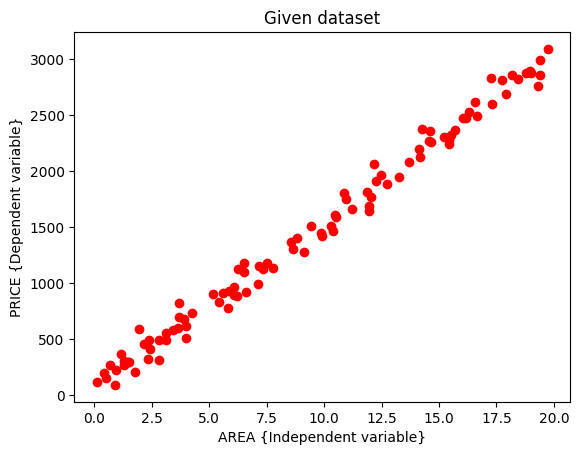

In [3]:
plt.title("Given dataset")
plt.xlabel("AREA {Independent variable}")
plt.ylabel("PRICE {Dependent variable}")
plt.scatter(data.Size,data.Price,color="red")
plt.show()

### To manually find the error for a random m and c 

In [4]:
def loss(m,c,data) -> int : 
    total_error=0
    for i in range(len(data.Price)):
        y=data.iloc[i].Size
        x=data.iloc[i].Price
        total_error+=(y-m*x-c)**2;
    total_error/=len(data.Price)
    return total_error
# We do not use this function in finding the value of m or  c .It is just to show how to find the total error mathematically.

### Gradient Descent:

In [5]:
def gradientDescent(current_m,current_c,data,L) :
    m_gradient=0
    c_gradient=0
    n=len(data.Price)
    for i in range(n):
        xc=round(data.iloc[i].Size,2)
        yc=round(data.iloc[i].Price,2)
        m_gradient+=-(2/n)*xc*(yc-current_m*xc-current_c) 
        c_gradient+=-(2/n)*(yc-current_m*xc-current_c)
    m=current_m-m_gradient*L
    c=current_c-c_gradient*L
    return m,c   

In [6]:
## Finding the values of m and c from the given training set
m=0
c=0
L=0.001
epoch=100
for i in range(epoch):
    m,c=gradientDescent(m,c,data,L)
print(f"m is {m:.2f} and c is {c:.2f}")  

m is 152.03 and c is 14.91


### Visual Representation of Linear Regression 

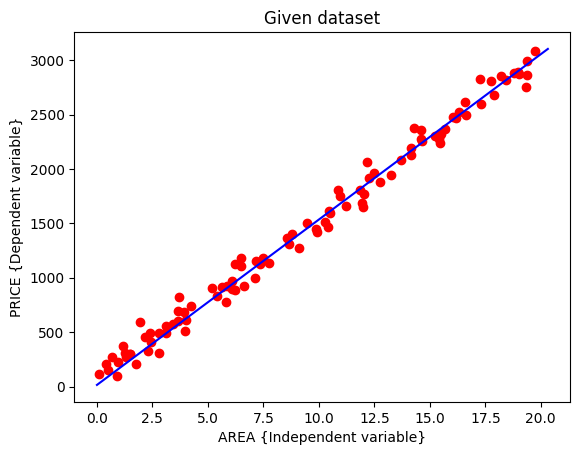

In [7]:
a = np.linspace(0,max(data.Price)/m,10)
b=m*a+c
plt.plot(a,b,color="blue")
plt.title("Given dataset")
plt.xlabel("AREA {Independent variable}")
plt.ylabel("PRICE {Dependent variable}")
plt.scatter(data.Size,data.Price,color="red")
plt.show()